<a href="https://colab.research.google.com/github/shumail1460/Digital-Signal-Processing/blob/main/DSP_Lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, fftshift
import scipy.io.wavfile as wav
from scipy.signal import resample, butter, filtfilt
import os
from IPython.display import Audio, display
from tkinter import Tk
from tkinter.filedialog import askopenfilename


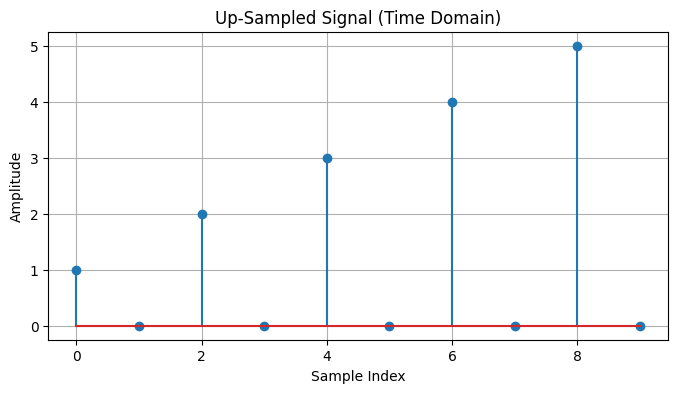

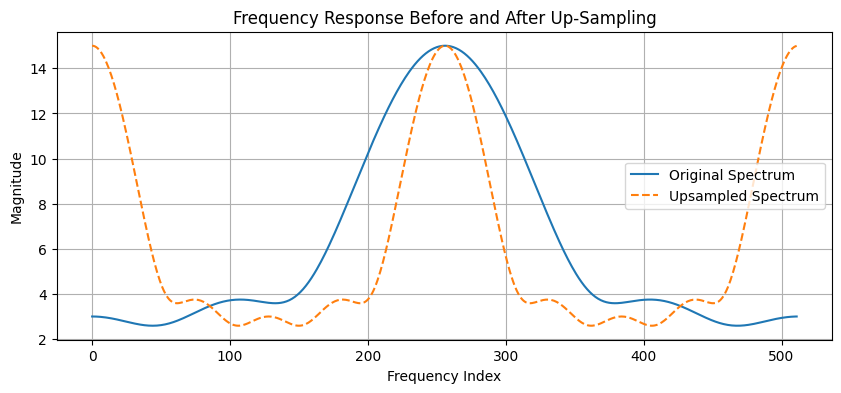

In [ ]:
# Define the original signal
x = np.array([1, 2, 3, 4, 5])
L = 2  # Up-sampling factor

# Insert zeros between samples (zero-stuffing)
upsampled_x = np.zeros(L * len(x))
upsampled_x[::L] = x

# Plot the up-sampled signal in the time domain
plt.figure(figsize=(8, 4))
plt.stem(upsampled_x)
plt.title("Up-Sampled Signal (Time Domain)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Compute the frequency response
X_f = fftshift(abs(fft(x, 512)))
Upsampled_X_f = fftshift(abs(fft(upsampled_x, 512)))

# Plot the frequency response before and after up-sampling
plt.figure(figsize=(10, 4))
plt.plot(X_f, label='Original Spectrum')
plt.plot(Upsampled_X_f, label='Upsampled Spectrum', linestyle='dashed')
plt.legend()
plt.title("Frequency Response Before and After Up-Sampling")
plt.xlabel("Frequency Index")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()


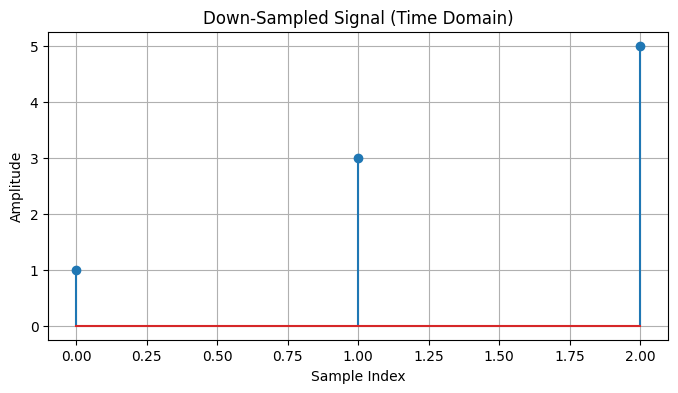

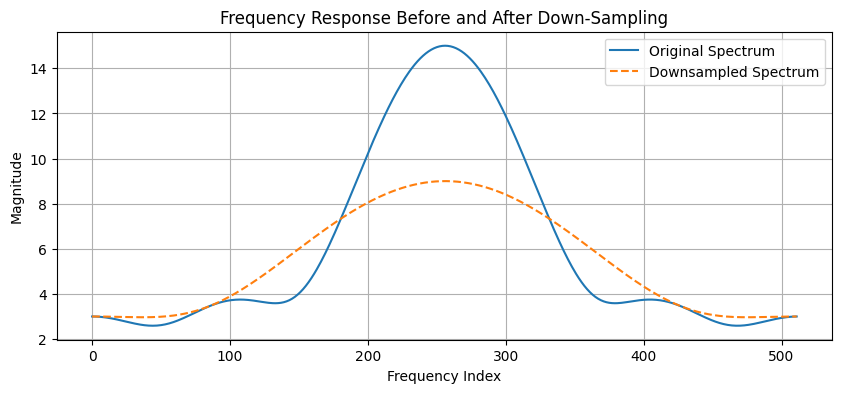

In [ ]:
# Down-sampling
M = 2  # Down-sampling factor
downsampled_x = x[::M]  # Keep every Mth sample

# Plot the down-sampled signal in the time domain
plt.figure(figsize=(8, 4))
plt.stem(downsampled_x)
plt.title("Down-Sampled Signal (Time Domain)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Compute the frequency response after down-sampling
Downsampled_X_f = fftshift(abs(fft(downsampled_x, 512)))

# Plot the frequency response before and after down-sampling
plt.figure(figsize=(10, 4))
plt.plot(X_f, label='Original Spectrum')
plt.plot(Downsampled_X_f, label='Downsampled Spectrum', linestyle='dashed')
plt.legend()
plt.title("Frequency Response Before and After Down-Sampling")
plt.xlabel("Frequency Index")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()


# **LAB TASK :**

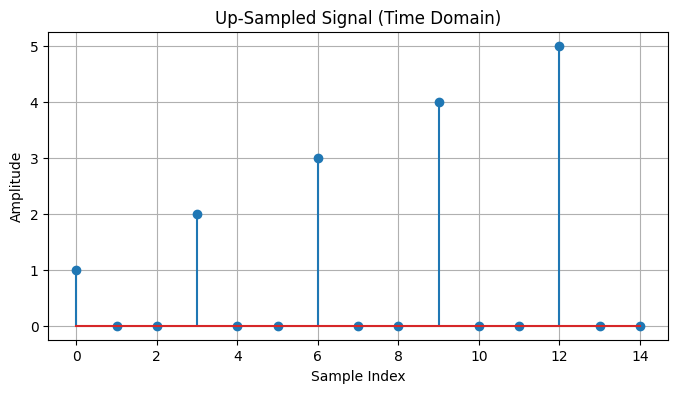

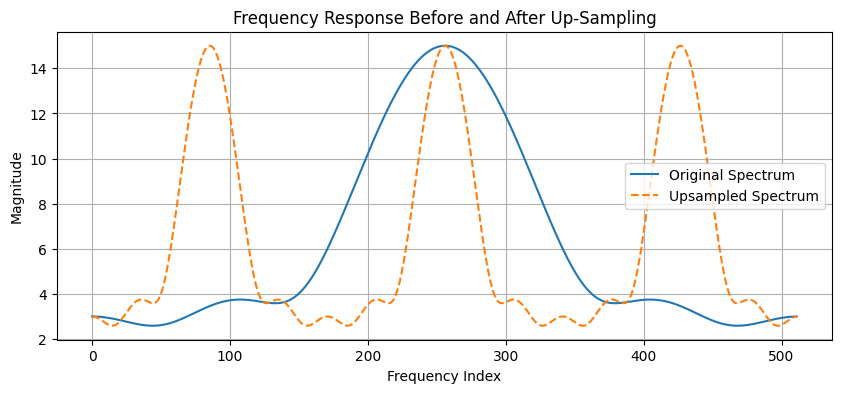

In [ ]:
# Define the original signal
x = np.array([1, 2, 3, 4, 5])
L = 3  # Up-sampling factor

# Insert zeros between samples (zero-stuffing)
upsampled_x = np.zeros(L * len(x))
upsampled_x[::L] = x

# Plot the up-sampled signal in the time domain
plt.figure(figsize=(8, 4))
plt.stem(upsampled_x)
plt.title("Up-Sampled Signal (Time Domain)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Compute the frequency response
X_f = fftshift(abs(fft(x, 512)))
Upsampled_X_f = fftshift(abs(fft(upsampled_x, 512)))

# Plot the frequency response before and after up-sampling
plt.figure(figsize=(10, 4))
plt.plot(X_f, label='Original Spectrum')
plt.plot(Upsampled_X_f, label='Upsampled Spectrum', linestyle='dashed')
plt.legend()
plt.title("Frequency Response Before and After Up-Sampling")
plt.xlabel("Frequency Index")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()


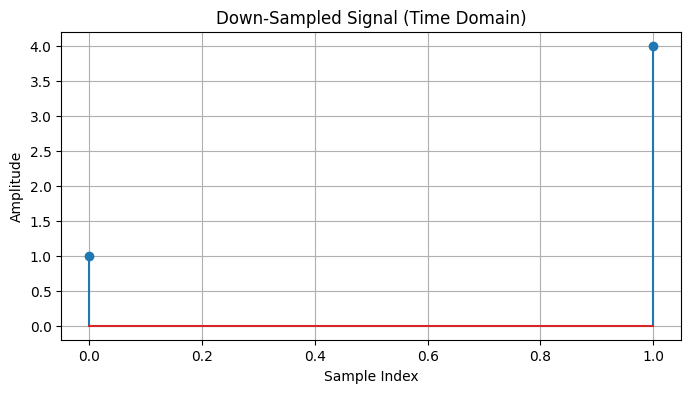

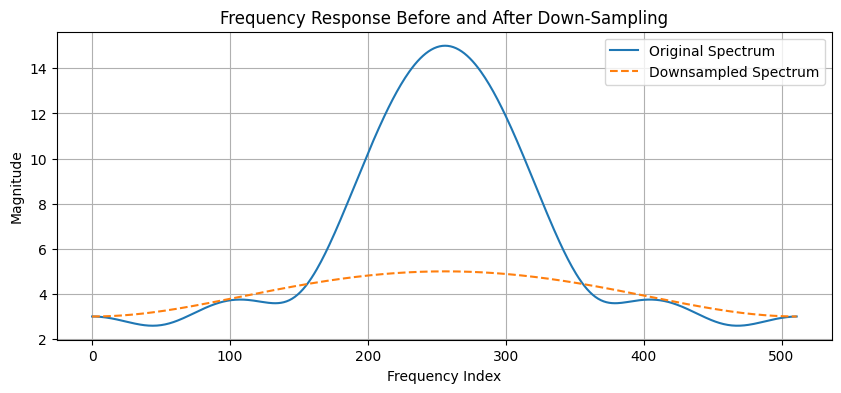

In [ ]:
# Down-sampling
M = 3  # Down-sampling factor
downsampled_x = x[::M]  # Keep every Mth sample

# Plot the down-sampled signal in the time domain
plt.figure(figsize=(8, 4))
plt.stem(downsampled_x)
plt.title("Down-Sampled Signal (Time Domain)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Compute the frequency response after down-sampling
Downsampled_X_f = fftshift(abs(fft(downsampled_x, 512)))

# Plot the frequency response before and after down-sampling
plt.figure(figsize=(10, 4))
plt.plot(X_f, label='Original Spectrum')
plt.plot(Downsampled_X_f, label='Downsampled Spectrum', linestyle='dashed')
plt.legend()
plt.title("Frequency Response Before and After Down-Sampling")
plt.xlabel("Frequency Index")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()


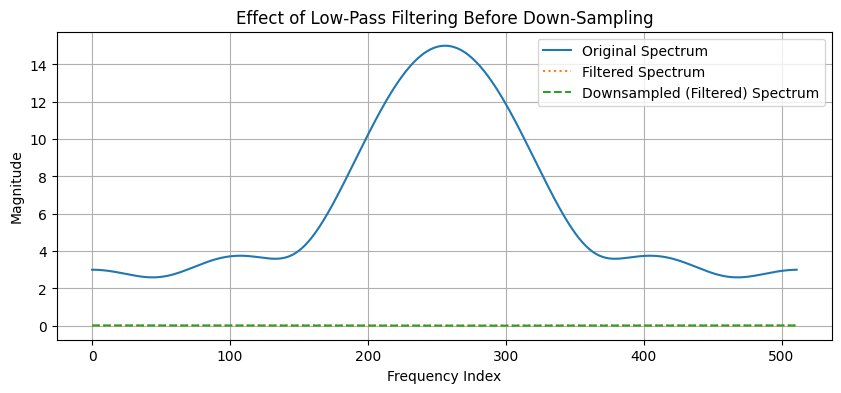

In [ ]:
# Design a low-pass FIR filter
cutoff = 1/M  # Normalized cutoff frequency (prevents aliasing)
num_taps = 21  # Filter length
lpf = firwin(num_taps, cutoff)

# Apply the filter
filtered_x = lfilter(lpf, 1.0, x)

# Down-sample after filtering
downsampled_filtered_x = filtered_x[::M]

# Frequency response
Filtered_X_f = fftshift(abs(fft(filtered_x, 512)))
Downsampled_Filtered_X_f = fftshift(abs(fft(downsampled_filtered_x, 512)))

# Plot results
plt.figure(figsize=(10, 4))
plt.plot(X_f, label='Original Spectrum')
plt.plot(Filtered_X_f, label='Filtered Spectrum', linestyle='dotted')
plt.plot(Downsampled_Filtered_X_f, label='Downsampled (Filtered) Spectrum', linestyle='dashed')
plt.legend()
plt.title("Effect of Low-Pass Filtering Before Down-Sampling")
plt.xlabel("Frequency Index")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()


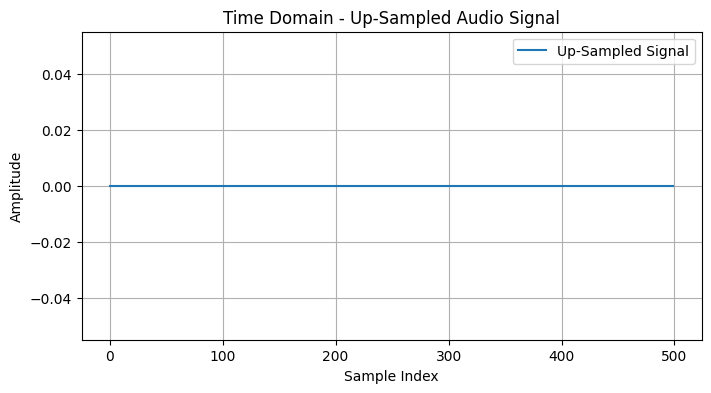

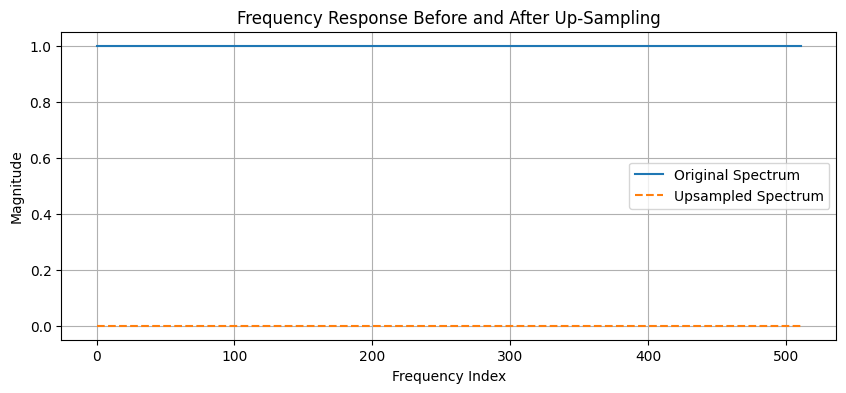

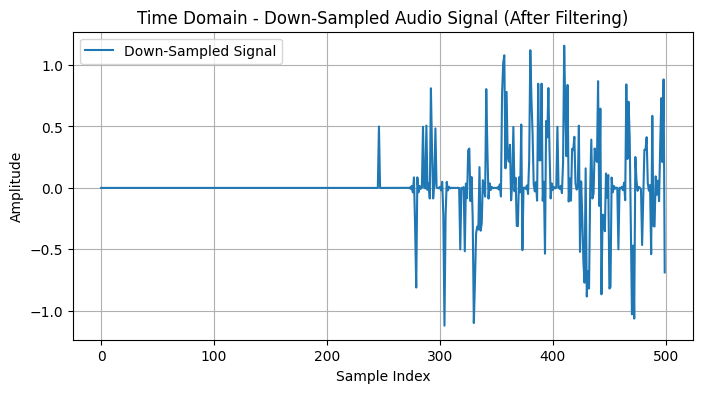

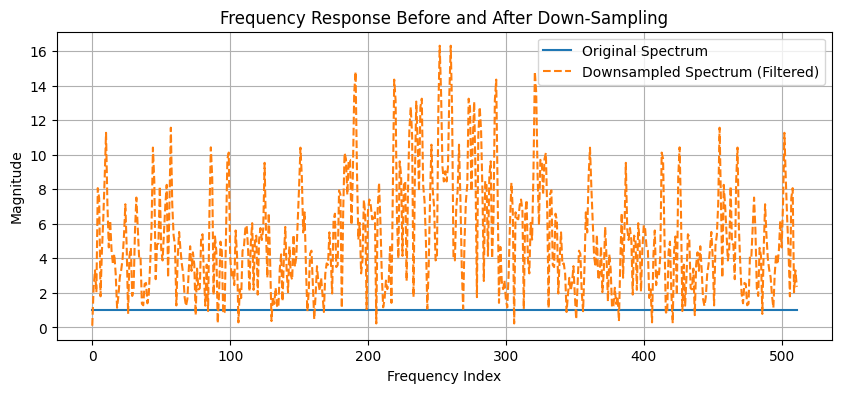

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, filtfilt, resample
from scipy.fftpack import fft, fftshift

# Load an audio signal
sample_rate, audio = wavfile.read("/content/FEMALE.wav")  # Replace with your file

# Normalize if stereo
audio = audio.astype(np.float32)
if len(audio.shape) > 1:
    audio = np.mean(audio, axis=1)  # Convert to mono

# Define up-sampling factor
L = 3  # Increase to analyze its effect

# Up-sample by inserting zeros
upsampled_audio = np.zeros(L * len(audio))
upsampled_audio[::L] = audio

# Plot up-sampled signal
plt.figure(figsize=(8, 4))
plt.plot(upsampled_audio[:500], label="Up-Sampled Signal")
plt.legend()
plt.title("Time Domain - Up-Sampled Audio Signal")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Frequency analysis
Audio_F = fftshift(abs(fft(audio, 512)))
Upsampled_Audio_F = fftshift(abs(fft(upsampled_audio, 512)))

plt.figure(figsize=(10, 4))
plt.plot(Audio_F, label="Original Spectrum")
plt.plot(Upsampled_Audio_F, label="Upsampled Spectrum", linestyle="dashed")
plt.legend()
plt.title("Frequency Response Before and After Up-Sampling")
plt.xlabel("Frequency Index")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

# Down-sampling
M = 2  # Down-sampling factor

# Design a low-pass filter
nyquist_rate = 0.5 * sample_rate
cutoff = nyquist_rate / M  # Keep below Nyquist limit
b, a = butter(4, cutoff / nyquist_rate, btype='low')
filtered_audio = filtfilt(b, a, audio)

# Down-sample the filtered signal
downsampled_audio = filtered_audio[::M]

# Plot down-sampled signal
plt.figure(figsize=(8, 4))
plt.plot(downsampled_audio[:500], label="Down-Sampled Signal")
plt.legend()
plt.title("Time Domain - Down-Sampled Audio Signal (After Filtering)")
plt.xlabel("Sample Index")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

# Frequency analysis
Downsampled_Audio_F = fftshift(abs(fft(downsampled_audio, 512)))

plt.figure(figsize=(10, 4))
plt.plot(Audio_F, label="Original Spectrum")
plt.plot(Downsampled_Audio_F, label="Downsampled Spectrum (Filtered)", linestyle="dashed")
plt.legend()
plt.title("Frequency Response Before and After Down-Sampling")
plt.xlabel("Frequency Index")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

# Save processed audio
wavfile.write("upsampled_audio.wav", sample_rate * L, upsampled_audio.astype(np.int16))
wavfile.write("downsampled_audio.wav", sample_rate // M, downsampled_audio.astype(np.int16))


Loaded audio: /content/CHILD.wav at 44100 Hz


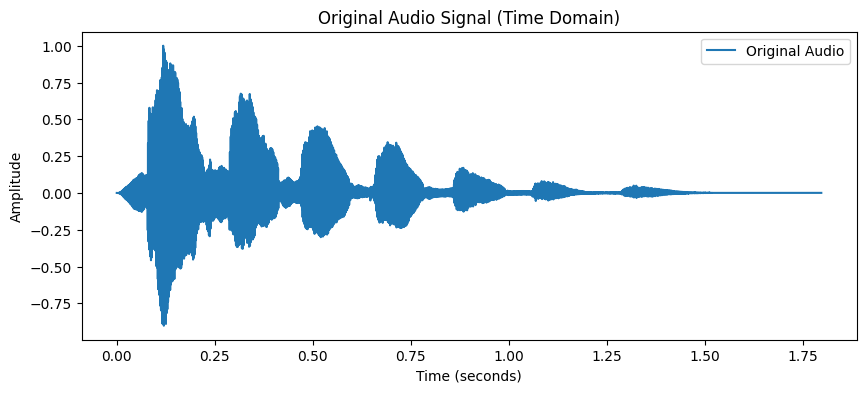

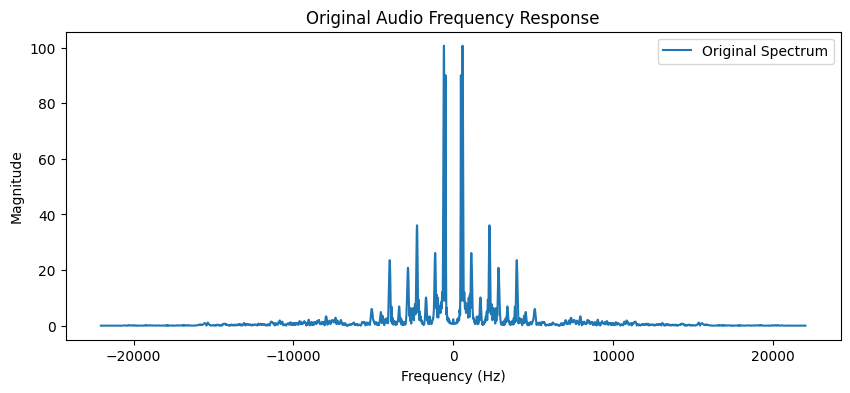

Playing original audio...


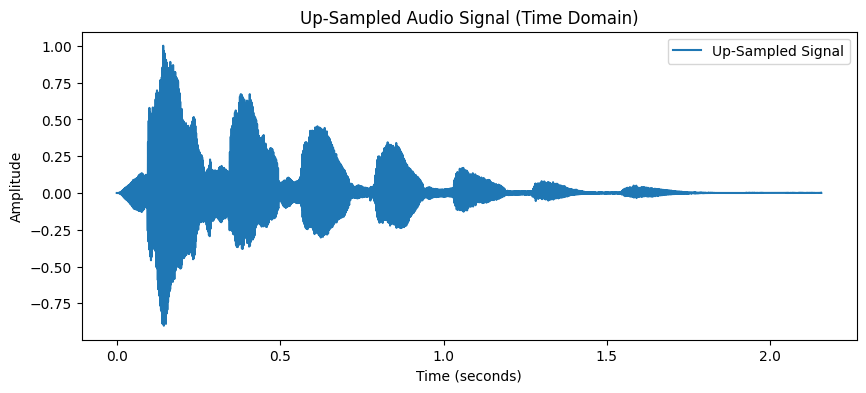

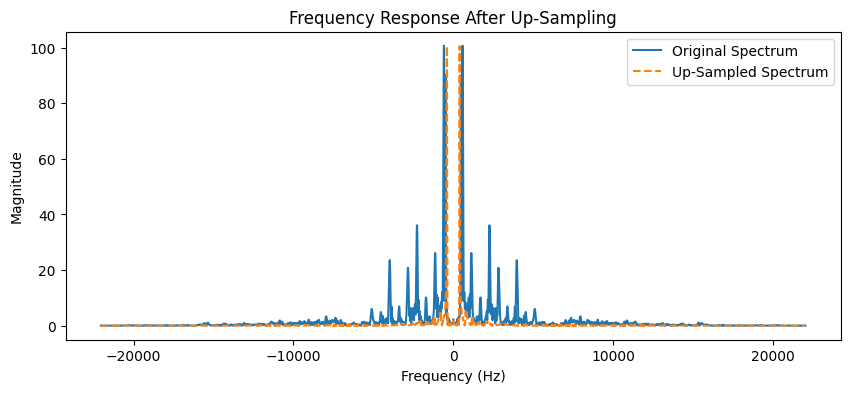

Playing upsampled audio (slightly slower)...


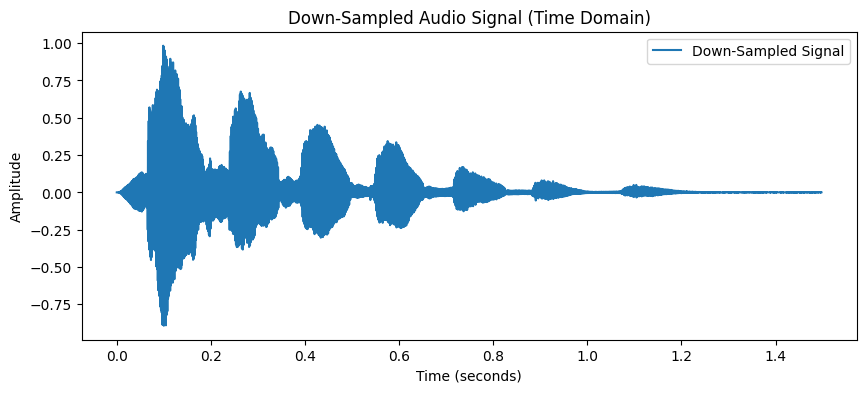

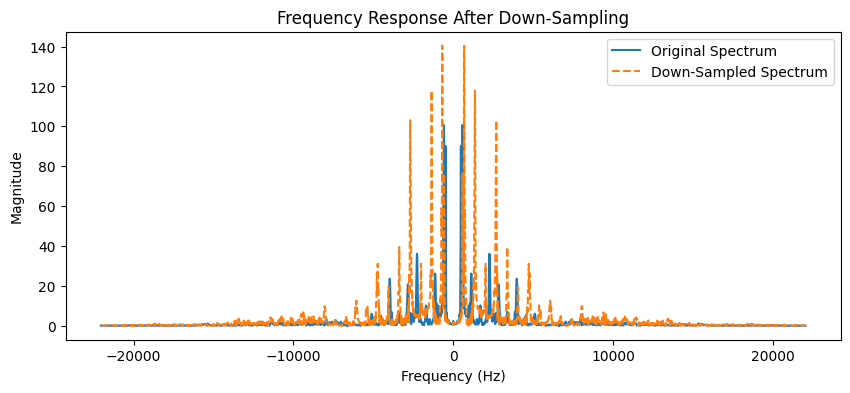

Playing downsampled audio (slightly faster)...


In [ ]:
# Function to select a file if not found
def get_audio_file():
    print("Please select an audio file...")
    root = Tk()
    root.withdraw()  # Hide the root window
    file_path = askopenfilename(filetypes=[("WAV files", "*.wav")])  # Prompt user for file
    return file_path if file_path else None

# Ask user for an audio file if it doesn't exist
file_path = "/content/CHILD.wav"  # Default file name

if not os.path.exists(file_path):
    print(f"Error: '{file_path}' not found.")
    file_path = get_audio_file()  # Prompt user to select a file

if file_path and os.path.exists(file_path):
    fs, audio = wav.read(file_path)
    print(f"Loaded audio: {file_path} at {fs} Hz")
else:
    print("No valid file selected. Generating a synthetic audio signal as fallback.")
    fs = 44100  # Default sampling rate
    audio = np.random.randn(10000)  # Generate a random signal

# Convert to mono if stereo
if len(audio.shape) > 1:
    audio = audio[:, 0]

# Normalize audio
audio = audio / np.max(np.abs(audio))

# Time vector for the original signal
t_original = np.linspace(0, len(audio) / fs, len(audio))

# Plot original waveform
plt.figure(figsize=(10, 4))
plt.plot(t_original, audio, label="Original Audio")
plt.title("Original Audio Signal (Time Domain)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

# Compute and plot original frequency spectrum
X_f = fftshift(abs(fft(audio, 4096)))
freqs = np.linspace(-fs/2, fs/2, len(X_f))

plt.figure(figsize=(10, 4))
plt.plot(freqs, X_f, label="Original Spectrum")
plt.title("Original Audio Frequency Response")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.show()

# Enable audio listening for original audio
print("Playing original audio...")
display(Audio(data=audio, rate=fs))

### Up-Sampling (Moderate Slowdown)
L = 1.2  # Up-sampling factor (less delay)
upsampled_audio = resample(audio, int(L * len(audio)))  # Smooth interpolation

# New time vector after upsampling
t_upsampled = np.linspace(0, len(audio) / (fs / L), len(upsampled_audio))

# Plot Up-Sampled Signal in Time Domain
plt.figure(figsize=(10, 4))
plt.plot(t_upsampled, upsampled_audio, label="Up-Sampled Signal")
plt.title("Up-Sampled Audio Signal (Time Domain)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

# Compute upsampled frequency spectrum
Upsampled_X_f = fftshift(abs(fft(upsampled_audio, 4096)))

plt.figure(figsize=(10, 4))
plt.plot(freqs, X_f, label="Original Spectrum")
plt.plot(freqs, Upsampled_X_f, label="Up-Sampled Spectrum", linestyle='dashed')
plt.title("Frequency Response After Up-Sampling")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.show()

# Enable listening to upsampled audio (moderate slowdown)
print("Playing upsampled audio (slightly slower)...")
display(Audio(data=upsampled_audio, rate=int(fs / L)))  # Slightly lower playback rate

### Down-Sampling (Moderate Speed-up)
M = 1.2  # Down-sampling factor (less speed-up)

# Apply a low-pass filter before down-sampling to avoid aliasing
def lowpass_filter(signal, cutoff_freq, fs, order=4):
    nyquist = fs / 2
    normal_cutoff = cutoff_freq / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return filtfilt(b, a, signal)

cutoff = fs / (2 * M)  # Prevent aliasing by filtering before down-sampling
filtered_audio = lowpass_filter(audio, cutoff, fs)

downsampled_audio = resample(filtered_audio, int(len(filtered_audio) / M))

# New time vector after downsampling
t_downsampled = np.linspace(0, len(audio) / (fs * M), len(downsampled_audio))

# Plot Down-Sampled Signal in Time Domain
plt.figure(figsize=(10, 4))
plt.plot(t_downsampled, downsampled_audio, label="Down-Sampled Signal")
plt.title("Down-Sampled Audio Signal (Time Domain)")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.legend()
plt.show()

# Compute downsampled frequency spectrum
Downsampled_X_f = fftshift(abs(fft(downsampled_audio, 4096)))

plt.figure(figsize=(10, 4))
plt.plot(freqs, X_f, label="Original Spectrum")
plt.plot(freqs, Downsampled_X_f, label="Down-Sampled Spectrum", linestyle='dashed')
plt.title("Frequency Response After Down-Sampling")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.show()

# Enable listening to downsampled audio (moderate speed-up)
print("Playing downsampled audio (slightly faster)...")
display(Audio(data=downsampled_audio, rate=int(fs * M)))  # Slightly higher playback rate